In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\pv437\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Importing Dataset
df = pd.read_csv(r'C:\Users\pv437\Desktop\Data Scince Folder\Projects\Project 1\bankruptcy-prevention.csv', delimiter=';')
print('Shape of the data',df.shape)
df.tail(10)

Shape of the data (250, 7)


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
240,0.0,1.0,0.5,0.5,0.5,0.0,non-bankruptcy
241,1.0,0.0,0.5,0.5,0.5,1.0,non-bankruptcy
242,0.0,1.0,0.5,0.5,0.5,1.0,non-bankruptcy
243,0.0,1.0,1.0,1.0,1.0,0.0,non-bankruptcy
244,1.0,0.0,1.0,1.0,1.0,1.0,non-bankruptcy
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [3]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [6]:
df.rename(columns={' management_risk':'management_risk',' financial_flexibility':'financial_flexibility',' credibility':'credibility',' competitiveness':'competitiveness',' operating_risk':'operating_risk',' class':'class'},inplace=True)

In [7]:
df['class'].value_counts().get('bankruptcy')

107

In [8]:
df['class'].value_counts().get('non-bankruptcy')

143

In [9]:
#Creating Df1 To change Bankruptcy and Non- Bankruptcy into Integer
df1=df.copy()
maping={'bankruptcy':0,'non-bankruptcy':1}
df1['class']=df1['class'].map(maping)
print('After Changing Bankruptcy to 0 & Non-Bankruptcy to 1 we get our dataframe as ' )
df1

After Changing Bankruptcy to 0 & Non-Bankruptcy to 1 we get our dataframe as 


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


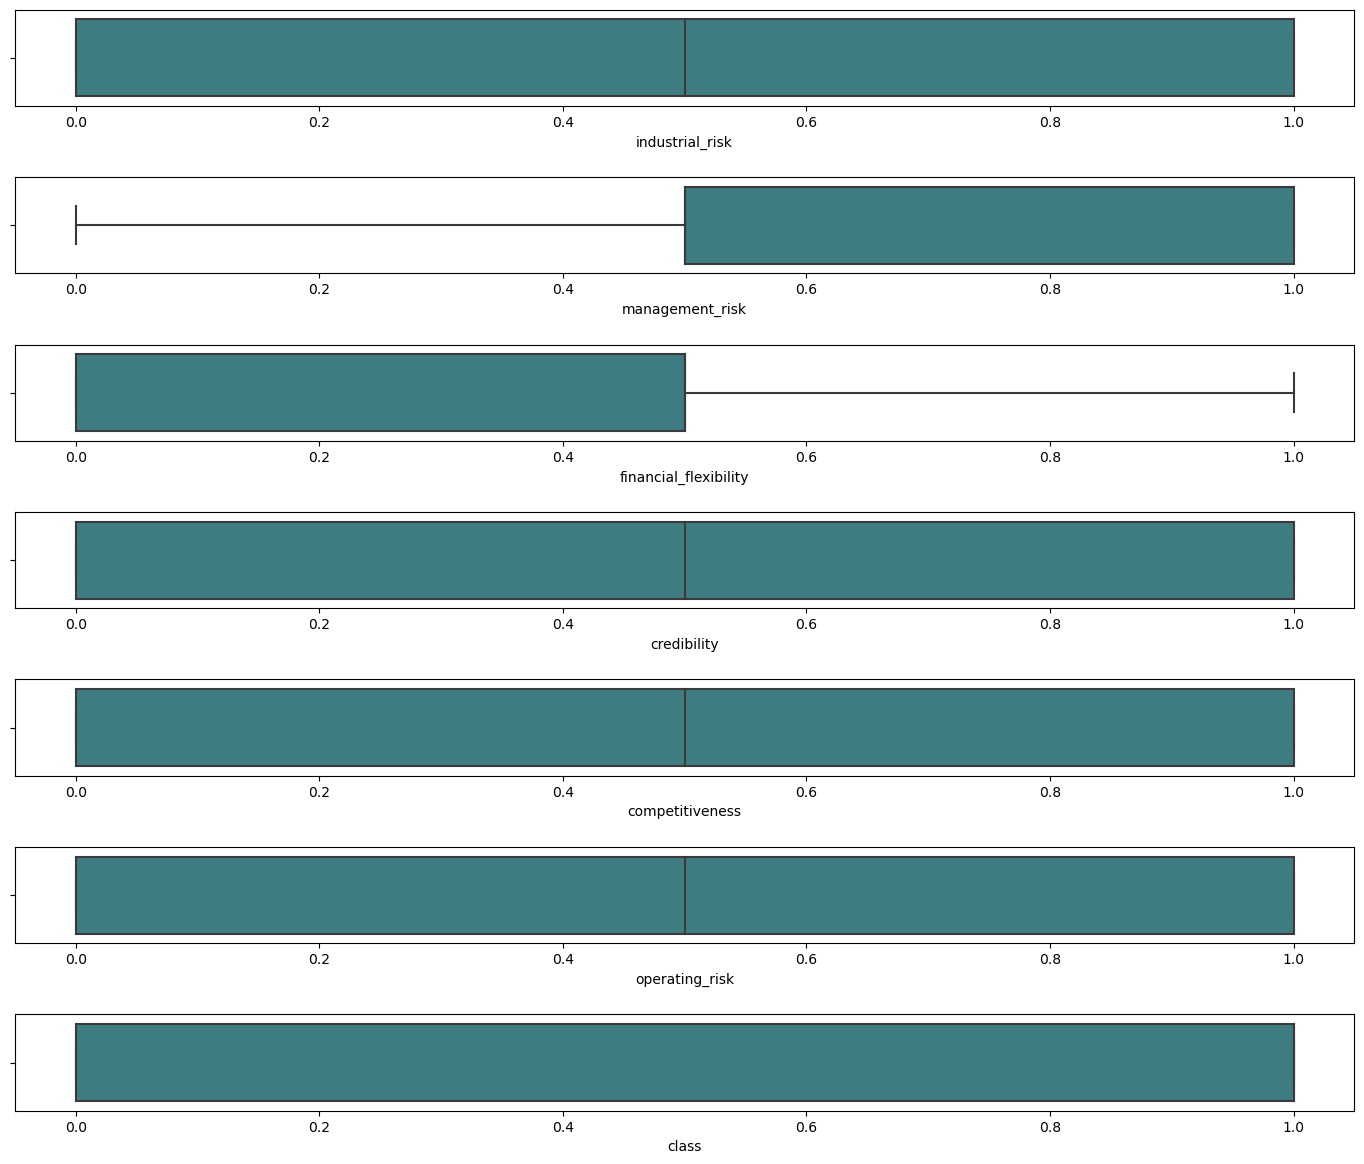

In [10]:
#outlier ppt
ot=df1.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='industrial_risk',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='management_risk',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='financial_flexibility',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='credibility',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='competitiveness',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='operating_risk',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='class',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

The Above Boxplot shows  that our data has no outlier.Each feature has three unique values 0 , 0.5 , 1 Which signifies there respected significance

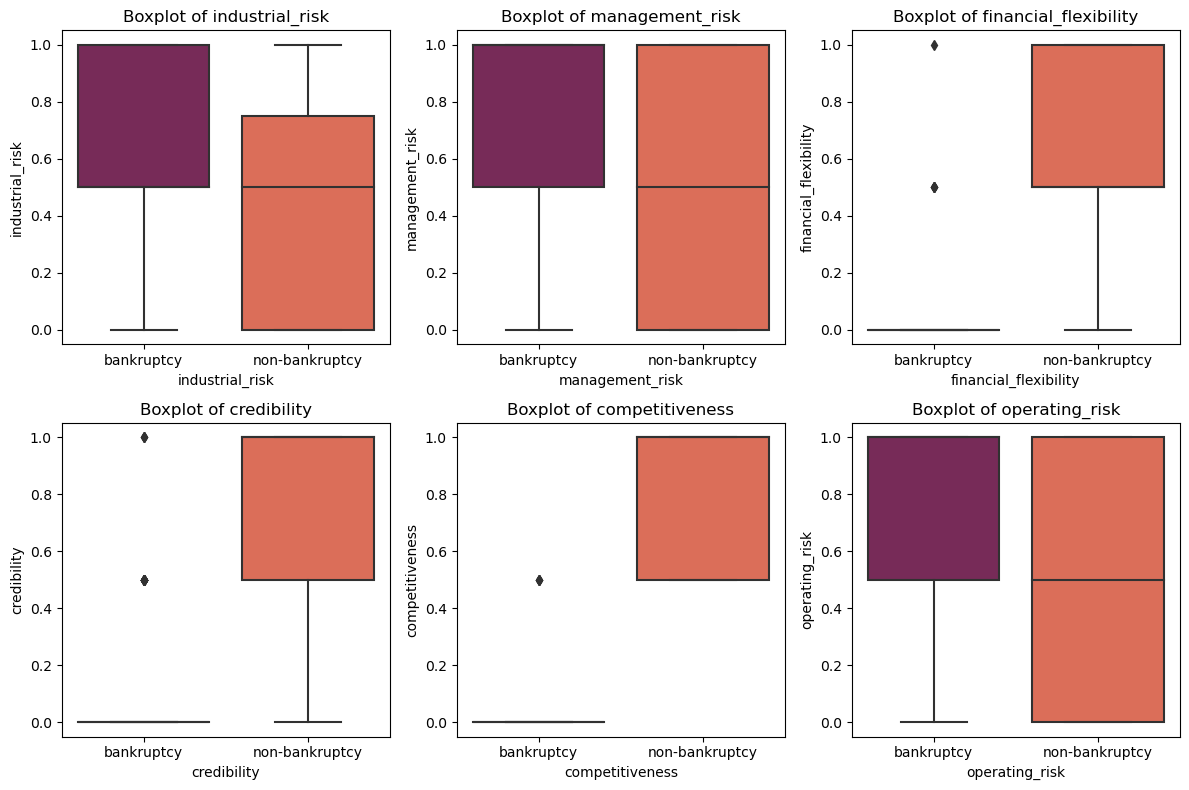

In [11]:
# Creating  boxplot for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='class', y=feature, data=df,palette='rocket')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

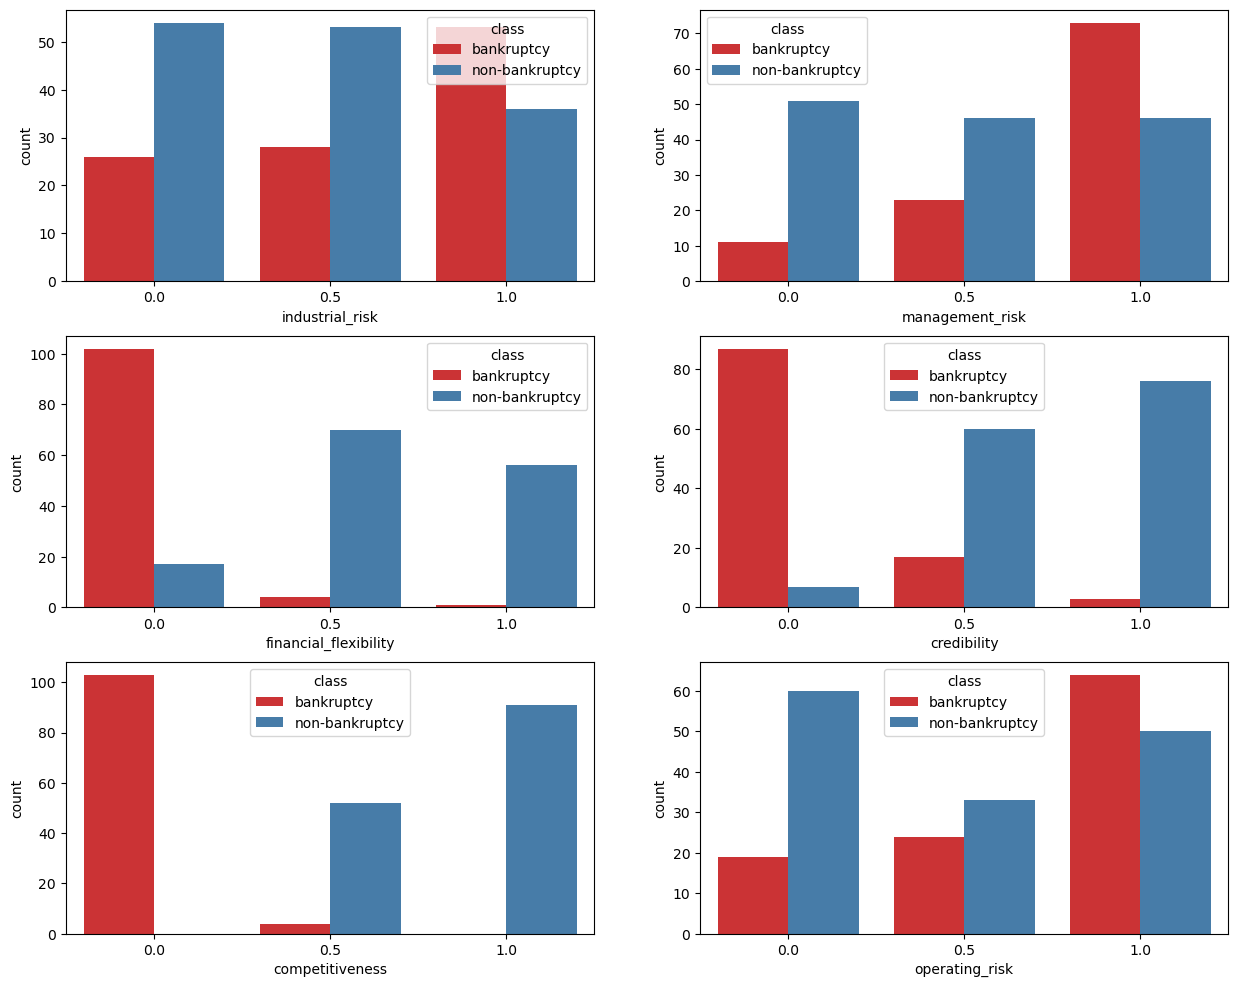

In [12]:
plt.figure(figsize=(15,12))
for i, predictor in enumerate(df.drop(columns=['class'])):
    ax=plt.subplot(3,2,i+1)
    sns.countplot(data=df,x=predictor,hue='class',palette='Set1')

Text(0.5, 1.0, 'Correlation with Class \n')

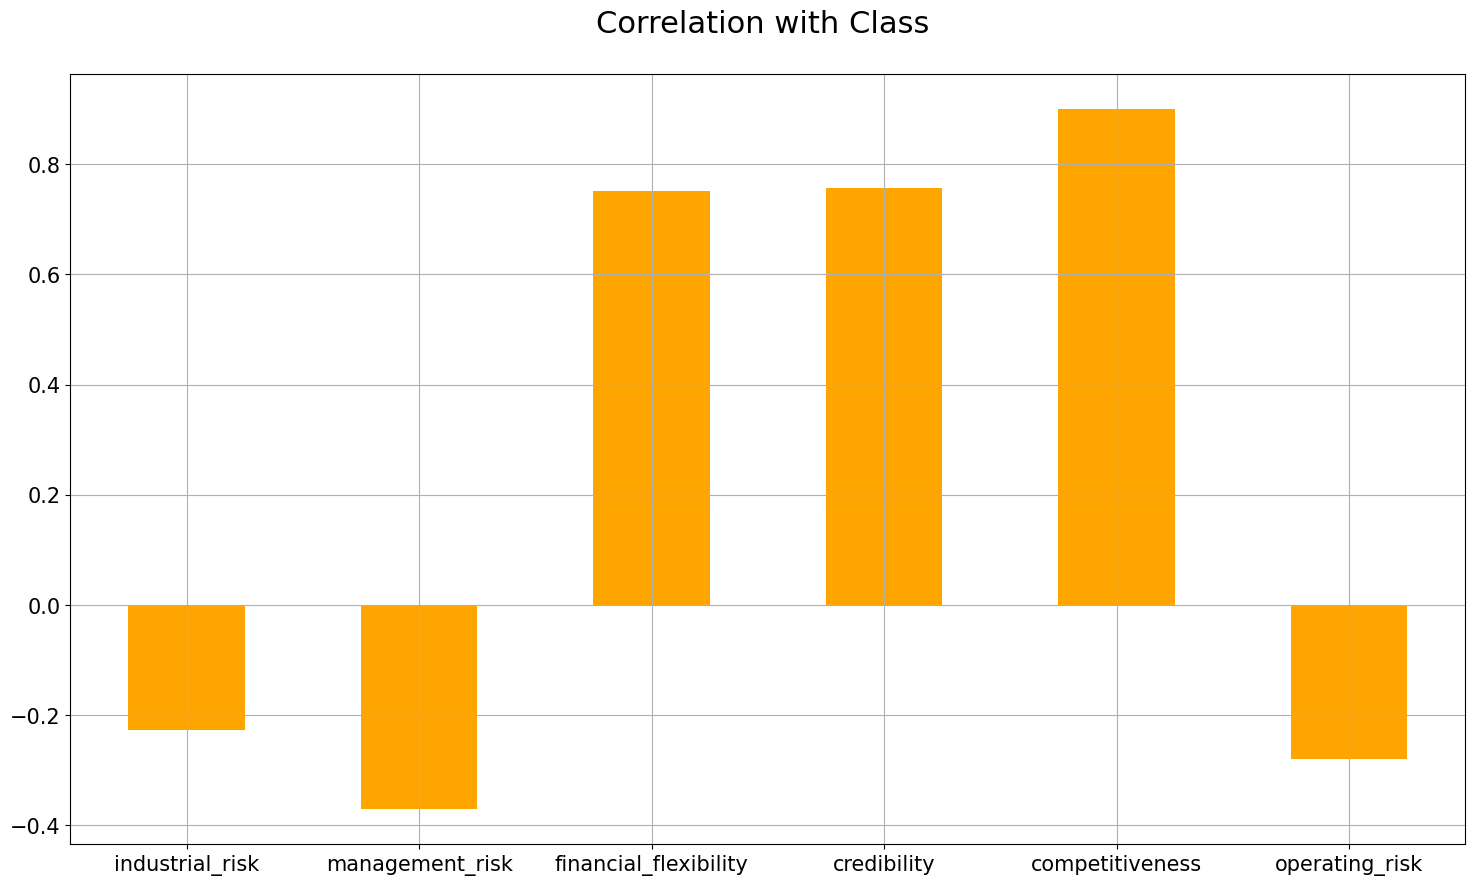

In [13]:
data=df1.copy()
correlations = data.corrwith(df1['class'])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 0, grid = True)
plt.title('Correlation with Class \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

Text(0.5, 1.0, 'Correlation Matrix')

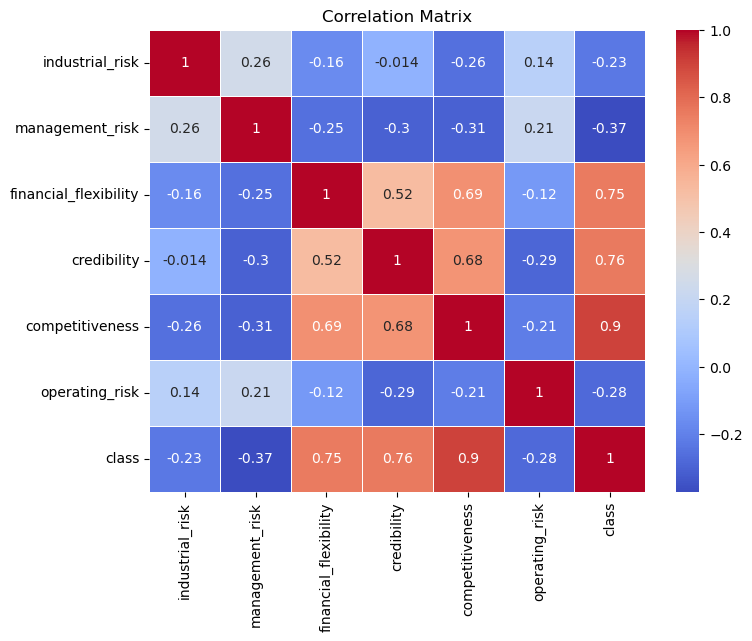

In [14]:
# Feature Relationships
correlation_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")

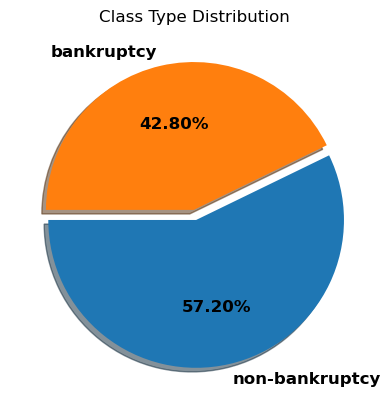

In [15]:
# Count the values in the 'class' column
class_counts = df['class'].value_counts()
# Plot a basic pie chart
plt.pie(class_counts, labels=class_counts.index,
        autopct='%.2f%%', 
        explode = [0.04,0.03],
        shadow= True,
        textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'},
        startangle=180 )
# Add a title
plt.title("Class Type Distribution")
# Show the pie chart
plt.show()


In [16]:
df.groupby(['class']).count()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
class,,,,,,
bankruptcy,107,107,107,107,107,107
non-bankruptcy,143,143,143,143,143,143


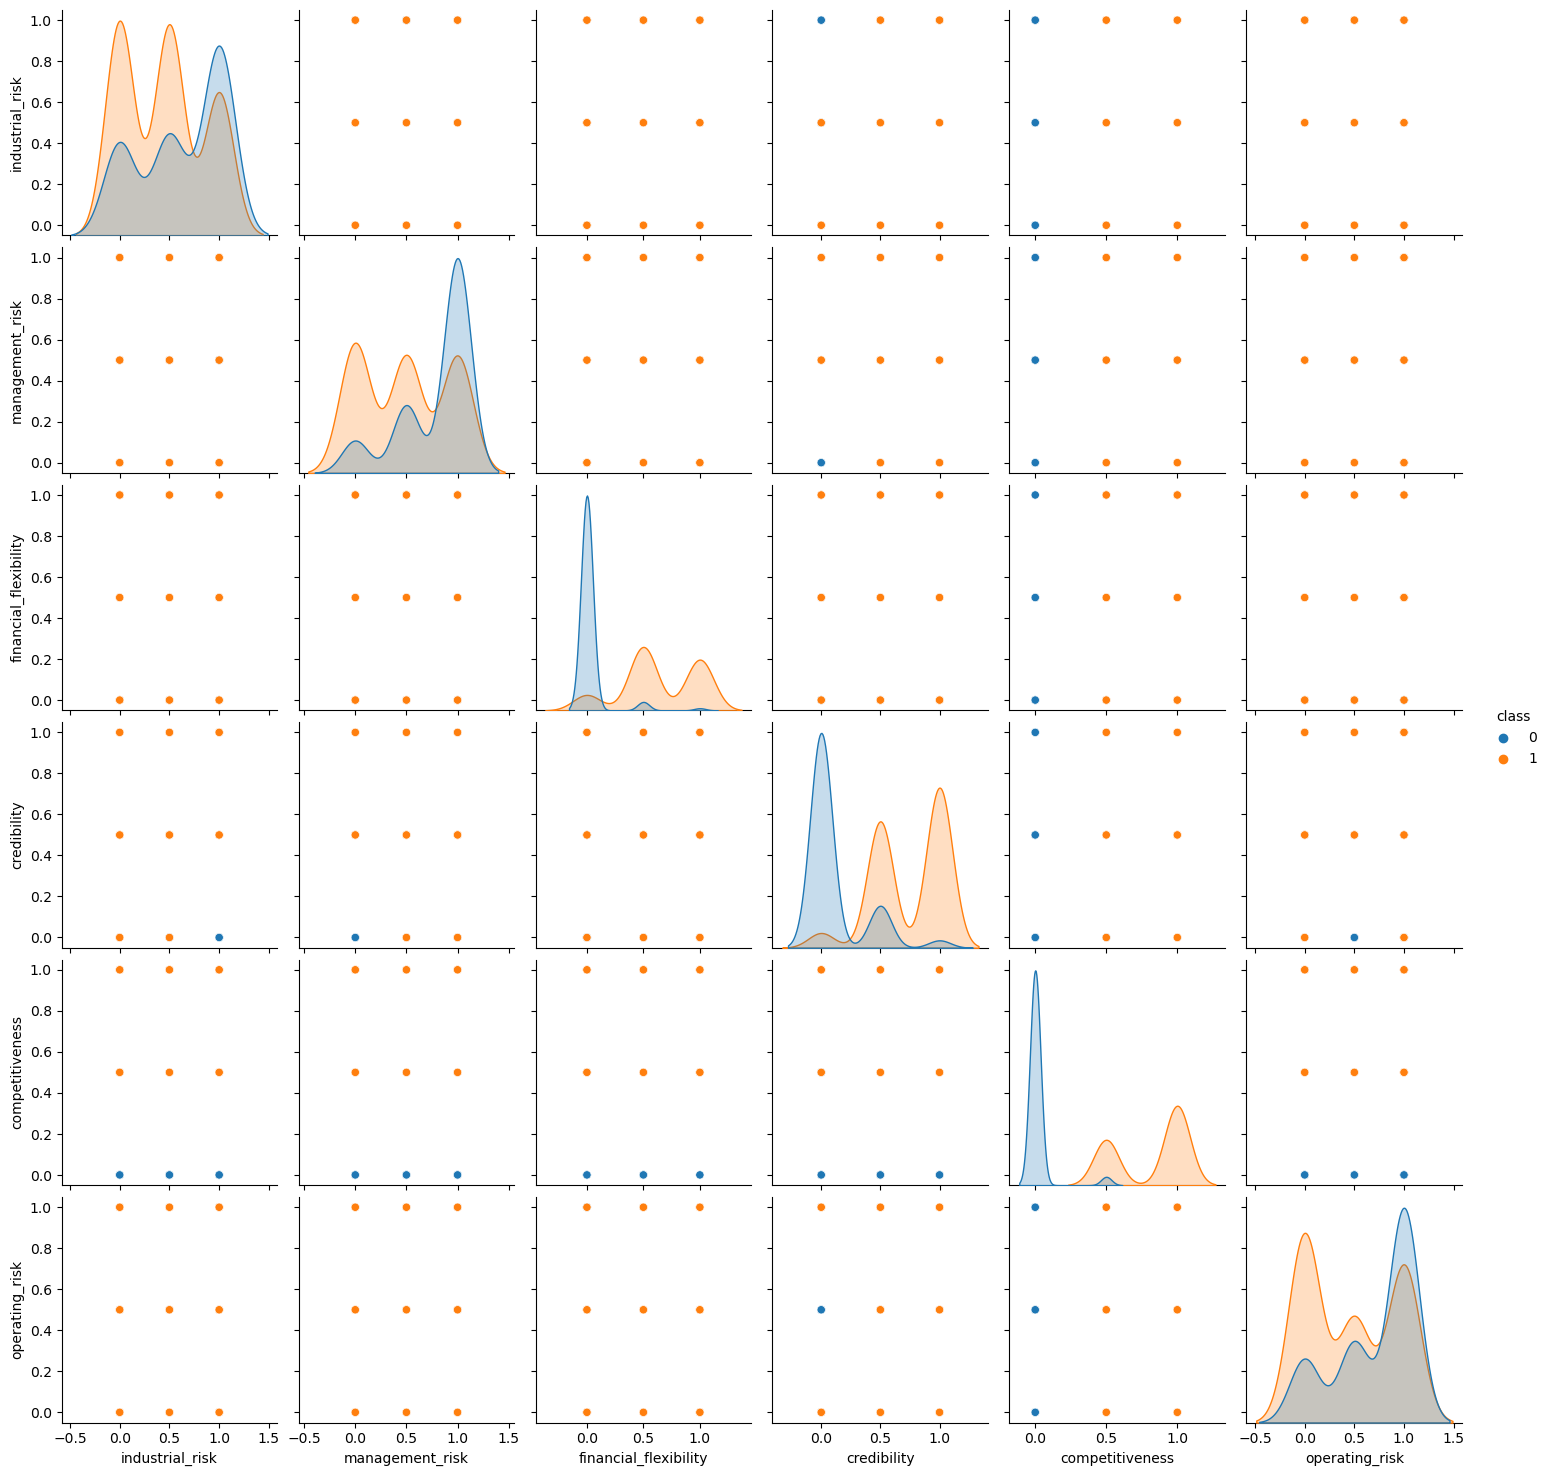

In [17]:
sns.pairplot(df1, hue='class')

In [18]:
x=df1.drop('class',axis=1)
x.head(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [19]:
y=df1['class']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
# applying SelectKBest class to extract top 6 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(x, y)

High chi2 value suggest, feature is useful in predicting the class variable

In [22]:
featureScores_univ = pd.DataFrame({'variables':x.columns, 'Score':fit.scores_})
featureScores_univ.sort_values(by=['Score'], ascending=False)

,variables,Score
4,competitiveness,82.186252
2,financial_flexibility,60.237242
3,credibility,52.307251
1,management_risk,9.407190
5,operating_risk,6.458129
0,industrial_risk,4.225298


In [23]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import DecisionTreeClassifier
import matplotlib.pyplot as plt



[0.01777084 0.0259649  0.30711108 0.17206803 0.4556815  0.02140366]


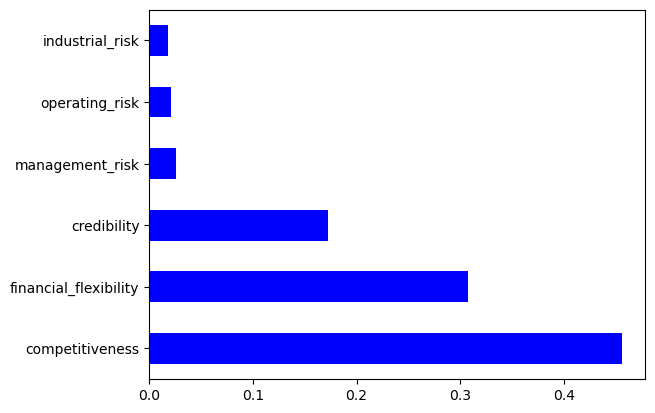

In [24]:
# use inbuilt class feature_importances of tree based classifiers
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(6).plot(kind='barh', color='b')
plt.show()

In [25]:
featureScores_dt = pd.DataFrame({'variables':x.columns, 'Score':model.feature_importances_})
featureScores_dt.sort_values(by=['Score'], ascending=False)

,variables,Score
4,competitiveness,0.455681
2,financial_flexibility,0.307111
3,credibility,0.172068
1,management_risk,0.025965
5,operating_risk,0.021404
0,industrial_risk,0.017771


In [26]:
#Splitting Dataset Into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
#Defining Decision Tree Model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=0)

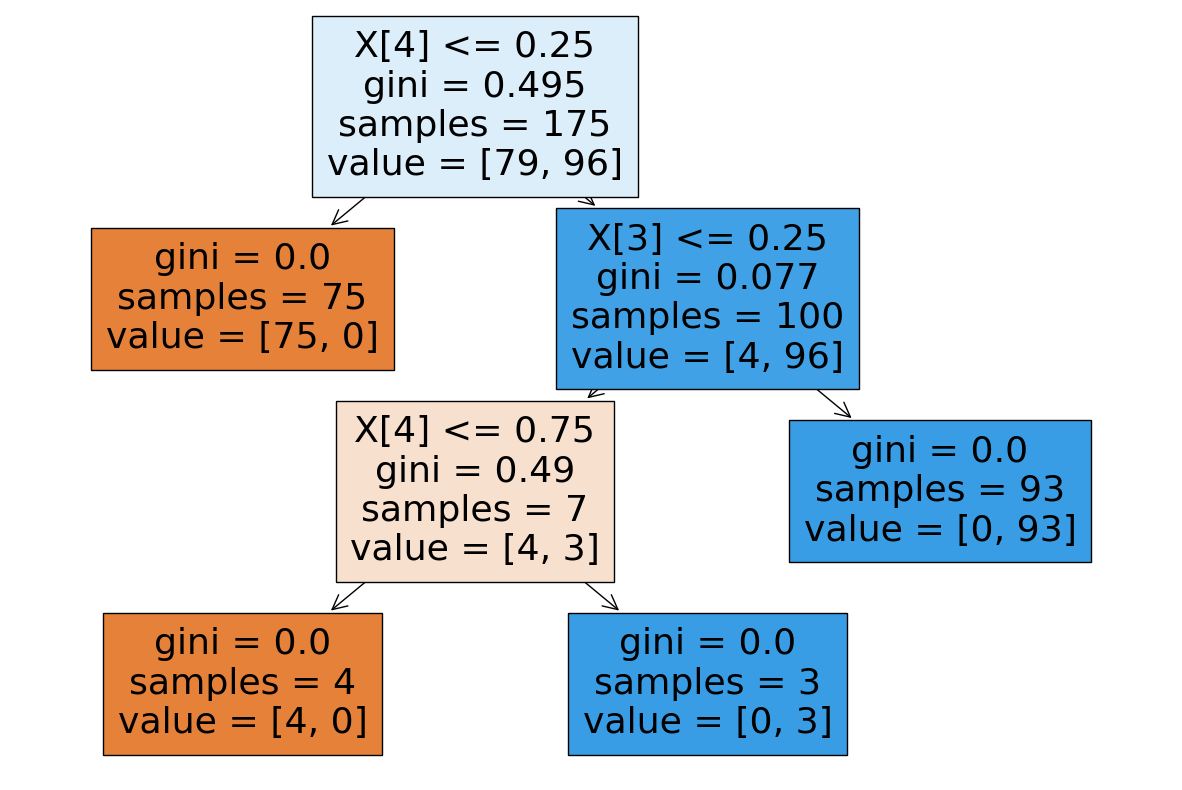

In [28]:
#Plotting the Decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [29]:
#Creating pred Variable to store Predicted Values
pred=model.predict(x_test)

In [30]:
#Creating New Dataset to Compare Predicted and Actual values
data_=pd.DataFrame({'Actual values':y_test,'Predicted Values':pred})
data_

,Actual values,Predicted Values
225,1,1
122,1,1
92,0,0
157,1,1
154,1,1
...,...,...
240,1,1
210,1,1
170,1,1
16,0,0


In [31]:
#Plotting Crosstab To check For True/False Positive/Negative Values 
pd.crosstab(y_test,pred)

col_0,0,1
class,,
0,28,0
1,1,46


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        47

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



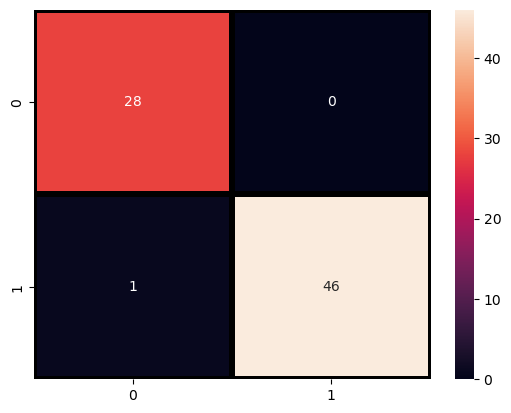

In [32]:
#Plotting Confusion Matrix and Classifiction report to check accuracy
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred))

In [33]:
#Testing Score
Test_score=model.score(x_test,y_test)
Test_score

0.9866666666666667

In [34]:
#Trainig Score
Train_score=model.score(x_train,y_train)
Train_score

1.0

In [35]:
#Applying Cost-Complexity Pruning Path to get ccp_alpha values
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 3 with ccp_alpha: 0.451395918367347


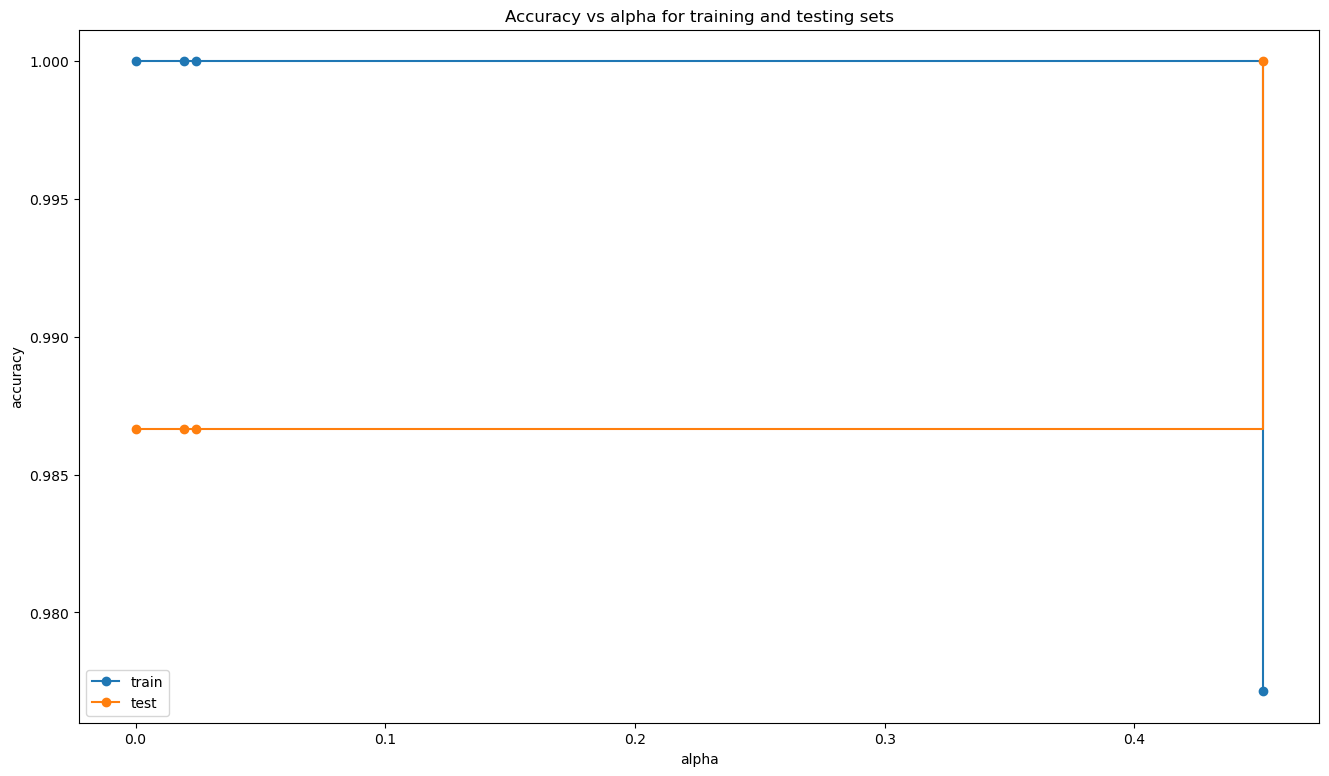

In [36]:
#Plotting visualization to help in  understanding  how the accuracy of the decision tree model
#changes as we vary the cost-complexity parameter (ccp_alpha)

train_scores = [clf.score(x_train ,y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
ccp_alphas

array([0.        , 0.01959184, 0.02429388, 0.45139592])

Training Accuracy 1.0 Testing Accuracy 0.9866666666666667
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        47

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



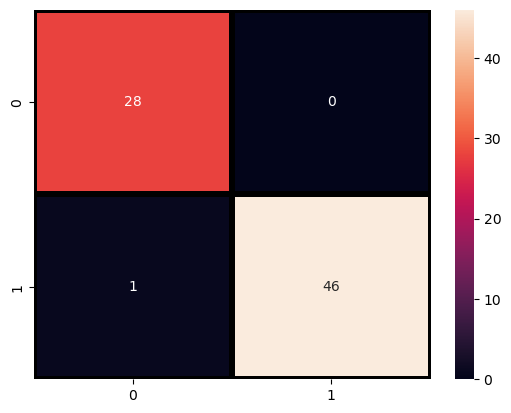

In [38]:
#Implementing  ccp_alpha value in Our model
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.01959184)
clf1.fit(x_train,y_train)

pred_test1=clf1.predict(x_test)
pred_train1=clf1.predict(x_train)
print('Training Accuracy',accuracy_score(y_train, pred_train1),  'Testing Accuracy',accuracy_score(y_test, pred_test1))

#Plotting Confusion Matrix and Classifiction report to check accuracy
sns.heatmap(confusion_matrix(y_test, pred_test1),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test1))

Training Accuracy 1.0 Testing Accuracy 0.9866666666666667
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        47

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



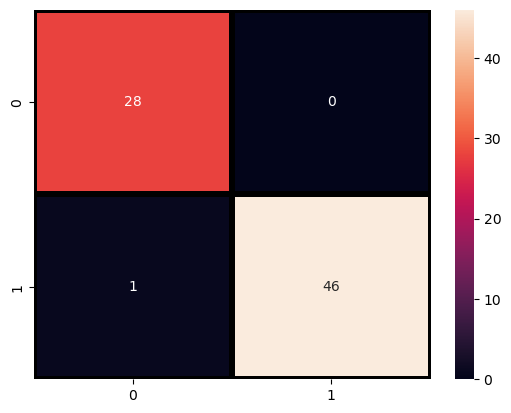

In [39]:
#Implementing  ccp_alpha value in Our model
clf2 = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.02429388)
clf2.fit(x_train,y_train)

pred_test2=clf2.predict(x_test)
pred_train2=clf2.predict(x_train)
print('Training Accuracy',accuracy_score(y_train, pred_train2),  'Testing Accuracy',accuracy_score(y_test, pred_test1))

#Plotting Confusion Matrix and Classifiction report to check accuracy
sns.heatmap(confusion_matrix(y_test, pred_test2),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test2))

In [40]:
#Implementing  ccp_alpha value in Our model
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.451395918367347)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.451395918367347, criterion='entropy',
                       random_state=0)

In [41]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
print('Training Accuracy',accuracy_score(y_train, pred_train),  'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.9771428571428571 Testing Accuracy 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        47

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



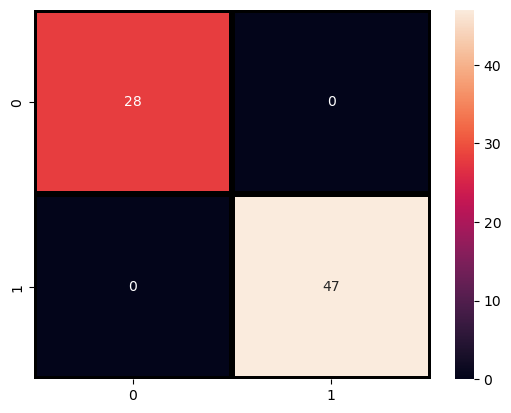

In [42]:
#Plotting Confusion Matrix and Classifiction report to check accuracy
sns.heatmap(confusion_matrix(y_test, pred_test),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test))

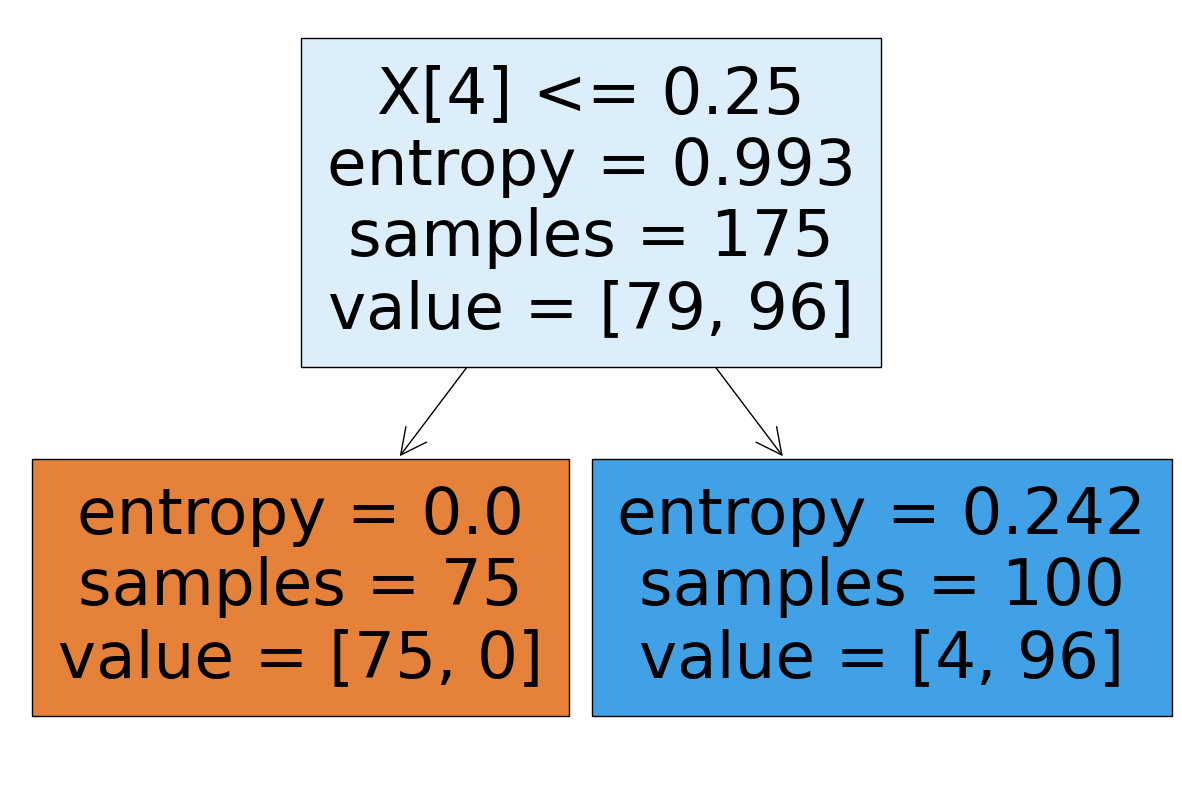

In [43]:
#Plotting the Decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()